📄 Upload a .txt file to summarize:


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Saving psychology-assignment 2.txt to psychology-assignment 2 (2).txt

📌 Original Text Word Count: 1275 words

🔹 Extractive Summary (Top 3 sentences):

The Indian media, particularly Republic TV (Arnab Goswami), Zee News, and Times Now, quickly labeled it a terrorist strike originating from Pakistan. Arnab Goswami declared the response a "necessary action to wipe out terror" (Republic TV, May 6), framing it as an act of national dignity. In Delhi, activists stood silently outside Pakistani consulates holding signs that read “Say No to War.” Schools along the border were shut, parents packed emergency bags, and people kept radios closed.

🔹 Abstractive Summary (Using T5):

social media mirrored the fervor. social media mirrored the fervor. geo News aired live reports from sialkot, sialkot, sialkot, sialkot.


/tmp/ipython-input-920106195.py:120: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


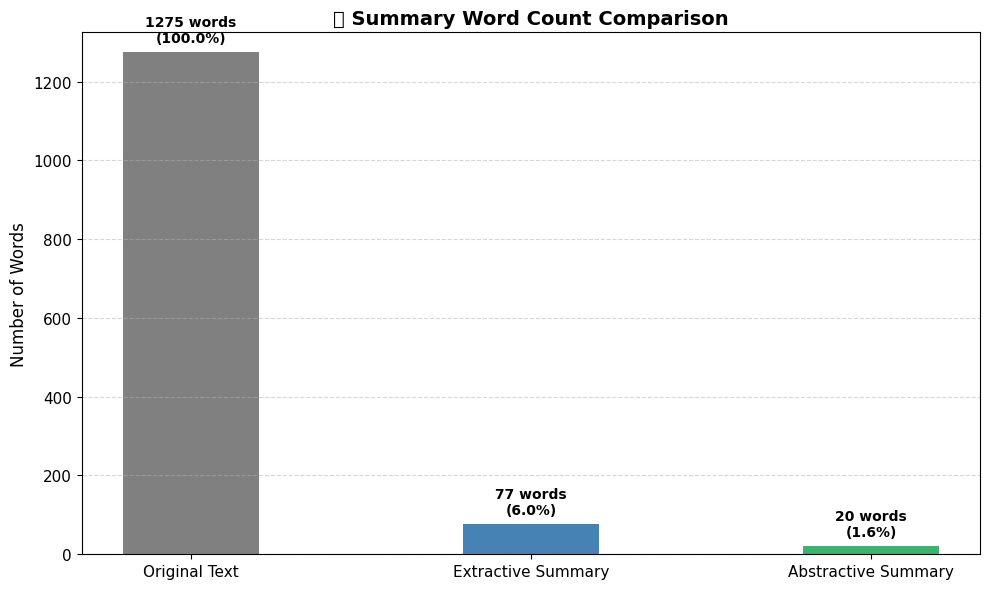


🔎 Compression Ratios:
- Extractive: 0.06
- Abstractive: 0.02


In [23]:
# Install dependencies
!pip install sumy transformers torch nltk

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


# --- Imports ---
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

from transformers import T5Tokenizer, T5ForConditionalGeneration

# File upload support
from IPython.display import display
from google.colab import files

# --- Extractive Summary ---
def extractive_summary(text, sentence_count=3):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentence_count)
    return ' '.join(str(sentence) for sentence in summary)

# --- Abstractive Summary ---
def abstractive_summary(text):
    tokenizer = T5Tokenizer.from_pretrained("t5-small")
    model = T5ForConditionalGeneration.from_pretrained("t5-small")

    input_text = "summarize: " + text.strip().replace("\n", " ")
    input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)

    summary_ids = model.generate(
        input_ids,
        max_length=100,
        min_length=30,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True
    )

    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# --- Upload Text File ---
print("📄 Upload a .txt file to summarize:")
uploaded = files.upload()

user_text = ""
for file_name in uploaded:
    with open(file_name, 'r', encoding='utf-8') as f:
        user_text = f.read()

# --- Summarize ---
if user_text.strip():
    print(f"\n📌 Original Text Word Count: {len(user_text.split())} words")

    print("\n🔹 Extractive Summary (Top 3 sentences):\n")
    extractive_summary_text = extractive_summary(user_text, 3)
    print(extractive_summary_text)

    print("\n🔹 Abstractive Summary (Using T5):\n")
    abstractive_summary_text = abstractive_summary(user_text)
    print(abstractive_summary_text)
else:
    print("⚠️ No valid text found.")
# --- Summary Comparison Metrics ---
import matplotlib.pyplot as plt

# Calculate metrics
original_word_count = len(user_text.split())
extractive_word_count = len(extractive_summary_text.split())
abstractive_word_count = len(abstractive_summary_text.split())

compression_extractive = extractive_word_count / original_word_count
compression_abstractive = abstractive_word_count / original_word_count

import matplotlib.pyplot as plt

# --- Summary Statistics ---
original_word_count = len(user_text.split())
extractive_word_count = len(extractive_summary_text.split())
abstractive_word_count = len(abstractive_summary_text.split())

compression_extractive = extractive_word_count / original_word_count
compression_abstractive = abstractive_word_count / original_word_count

# --- Data Preparation ---
labels = ['Original Text', 'Extractive Summary', 'Abstractive Summary']
word_counts = [original_word_count, extractive_word_count, abstractive_word_count]
compression_ratios = [1.0, compression_extractive, compression_abstractive]

colors = ['gray', 'steelblue', 'mediumseagreen']
bar_width = 0.4

# --- Plotting ---
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, word_counts, width=bar_width, color=colors)

# Add annotations with both word count and compression ratio
for i, bar in enumerate(bars):
    height = bar.get_height()
    percent = (height / original_word_count) * 100
    plt.annotate(f'{height} words\n({percent:.1f}%)',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10, fontweight='bold')

# --- Styling ---
plt.title("📝 Summary Word Count Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Number of Words", fontsize=12)
plt.ylim(0, original_word_count + 50)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

# --- Show Plot ---
plt.show()

print("\n🔎 Compression Ratios:")
print(f"- Extractive: {compression_extractive:.2f}")
print(f"- Abstractive: {compression_abstractive:.2f}")
